In [20]:
# Importation des bibliothèques nécessaire
import numpy as np
import pandas as pd
import datetime
%matplotlib inline
import matplotlib.pyplot as plt

In [21]:
# Charger les données du fichier
naissances = pd.read_csv("births.csv")
naissances.shape

(15547, 5)

In [41]:
# Pour avoir un aperçu du tableau
naissances.head()

,year,month,day,gender,births,date
0,1969,1,1,F,4046,1969-01-01
1,1969,1,1,M,4440,1969-01-01
2,1969,1,2,F,4454,1969-01-02
3,1969,1,2,M,4548,1969-01-02
4,1969,1,3,F,4548,1969-01-03


In [23]:
naissances.tail()

,year,month,day,gender,births
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215
15546,2008,12,NaN,M,181235


In [24]:
# Enlevons ces lignes qui contiennent des "NaN"
naissances = naissances.dropna()
naissances.tail()

,year,month,day,gender,births
15062,1988,12,29.0,M,5944
15063,1988,12,30.0,F,5742
15064,1988,12,30.0,M,6095
15065,1988,12,31.0,F,4435
15066,1988,12,31.0,M,4698


In [42]:
naissances.dtypes

year               int64
month              int64
day                int64
gender            object
births             int64
date      datetime64[ns]
dtype: object

In [26]:
# Vérifions que nos dates sont dans les plages correctes
print("Les jours dans le tableau : ", naissances.day.unique())
print("Les mois de naissance : ", naissances.month.unique())
print("Les années de naissance : ",naissances.year.unique())

Les jours dans le tableau :  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 99.]
Les mois de naissance :  [ 1  2  3  4  5  6  7  8  9 10 11 12]
Les années de naissance :  [1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982
 1983 1984 1985 1986 1987 1988]


In [27]:
# La ligne avec day = '99' est à enlever
# Commencer par convertir la colonne 'day' en type entier pour filtrer
naissances['day'] = naissances['day'].astype(np.int64)
naissances = naissances[naissances['day'] <= 31]

# Dans le calendrier Grégorien, les mois suivantes finissent le "30" : avril, juin, septembre, novembre
mois_courtes = [4, 6, 9, 11]
"""for i in mois_courtes:
    naissances.drop(naissances[(naissances.month == i) & (naissances.day > 30)].index, axis=0, inplace=True)"""
[naissances.drop(naissances[(naissances.month == i) & (naissances.day > 30)].index, axis=0, inplace=True) for i in mois_courtes]

# Il reste à gerer le mois de février qui dépend si l'année est bissextile (29 j) ou non (28 j)
def bissextile(a):
    """Dit si l'année donnée est bissextile ou non"""
    return (a%4==0 and a%100!=0) or a%400==0

annee_unique = naissances.year.unique()
for annee in annee_unique:
    if bissextile(annee):
        naissances.drop(naissances[(naissances.year == annee) & (naissances.month == 2) & (naissances.day > 29)].index, axis=0, inplace=True)
    else:
        naissances.drop(naissances[(naissances.year == annee) & (naissances.month == 2) & (naissances.day > 28)].index, axis=0, inplace=True)


# verifions le résultat
df = naissances.query('month == 2')
print(df.day.unique())
print(annee_unique)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
[1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982
 1983 1984 1985 1986 1987 1988]


In [28]:
# Passons maintentant à la conversion des trois colonnes en date
naissances["date"] = pd.to_datetime(naissances[["day","month","year"]])
naissances.head()
#naissances.index.values

,year,month,day,gender,births,date
0,1969,1,1,F,4046,1969-01-01
1,1969,1,1,M,4440,1969-01-01
2,1969,1,2,F,4454,1969-01-02
3,1969,1,2,M,4548,1969-01-02
4,1969,1,3,F,4548,1969-01-03


Ci-dessous, on va tenter de regrouper le genre M et F par la fonction tableau dynamiquement croisée

In [29]:
# On garde l'année pour trier les décennies
naissances_test = naissances.pivot_table(index=['date'], values=['births', 'year'], aggfunc={'births':'sum', 'year':'max'})
naissances_test.head()

,births,year
date,,
1969-01-01,8486,1969
1969-01-02,9002,1969
1969-01-03,9542,1969
1969-01-04,8960,1969
1969-01-05,8390,1969


In [30]:
# Conversion de l'objet date en jour de la semaine
# O correspond à lundi et 6 correspond à dimanche
# Comme on a placé la colonne date, il est de type numpy.ndarray
# Il faut le convertir en pandas Séries pour pouvoir utiliser le dt.weekday
jour_semaine = pd.Series(naissances_test.index.values).dt.weekday
jour_semaine.head()

0    2
1    3
2    4
3    5
4    6
dtype: int64

In [31]:
# Ci-dessus, on voit bien que le jour de la semaine est bien convertie
naissances_test["jour_de_la_semaine"] = jour_semaine
naissances_test.head()

,births,year,jour_de_la_semaine
date,,,
1969-01-01,8486,1969,NaN
1969-01-02,9002,1969,NaN
1969-01-03,9542,1969,NaN
1969-01-04,8960,1969,NaN
1969-01-05,8390,1969,NaN


En l'ajoutant comme colonne dans le dataframe "naissances_test", j'obtiens des Nan.

Donc pas le choix, on passe à une autre solution.

In [32]:
# Comme on regroupera par rapport à la colonne date, il faut séparer les trois décénnies avec la colonne "year"
decenie_60 = naissances.query('year < 1970')
decenie_70 = naissances.query('year >= 1970 and year < 1980')
decenie_80 = naissances.query('year >= 1980')
decenie_60.head()

,year,month,day,gender,births,date
0,1969,1,1,F,4046,1969-01-01
1,1969,1,1,M,4440,1969-01-01
2,1969,1,2,F,4454,1969-01-02
3,1969,1,2,M,4548,1969-01-02
4,1969,1,3,F,4548,1969-01-03


In [33]:
# Regroupons les genres males ou femelles par date
decenie_60 = decenie_60.groupby('date', as_index= False).agg({"births":"sum"})
decenie_70 = decenie_70.groupby('date', as_index= False).agg({"births":"sum"})
decenie_80 = decenie_80.groupby('date', as_index= False).agg({"births":"sum"})
decenie_80.tail()

,date,births
3283,1988-12-27,11528
3284,1988-12-28,11847
3285,1988-12-29,11704
3286,1988-12-30,11837
3287,1988-12-31,9133


In [34]:
# Ajoutons la colonne jour pour dire à quelle jour de la semaine correspond la date
# O correspond à lundi et 6 correspond à dimanche
decenie_60["jour"] = decenie_60['date'].dt.weekday
decenie_70["jour"] = decenie_70['date'].dt.weekday
decenie_80["jour"] = decenie_80['date'].dt.weekday
len(decenie_60)

365

In [35]:
# Pour facilier l'affichage, plaçon la colonne date comme index puisqu'elle sera l'ordonnée de notre graphe
decenie_60 = decenie_60.set_index('date')
decenie_70 = decenie_70.set_index('date')
decenie_80 = decenie_80.set_index('date')
decenie_60.head()

,births,jour
date,,
1969-01-01,8486,2
1969-01-02,9002,3
1969-01-03,9542,4
1969-01-04,8960,5
1969-01-05,8390,6


In [36]:
def jour_semaine(df, jour):
    """Renvoie dataframe qui contient le jour spécifié
    paramètre jour : 0 = lundi et 6 correspond à dimanche"""
    return df[df["jour"] == jour]

In [37]:
hebdo = ['Lundi','Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']

Passons maintenant à la dernière partie de l'activité qui est d'afficher les graphiques avec trois courbes qui représentent le nombre de naissances pour chaque jour de la semaine pour les décennies 1960, 1970 et 1980.

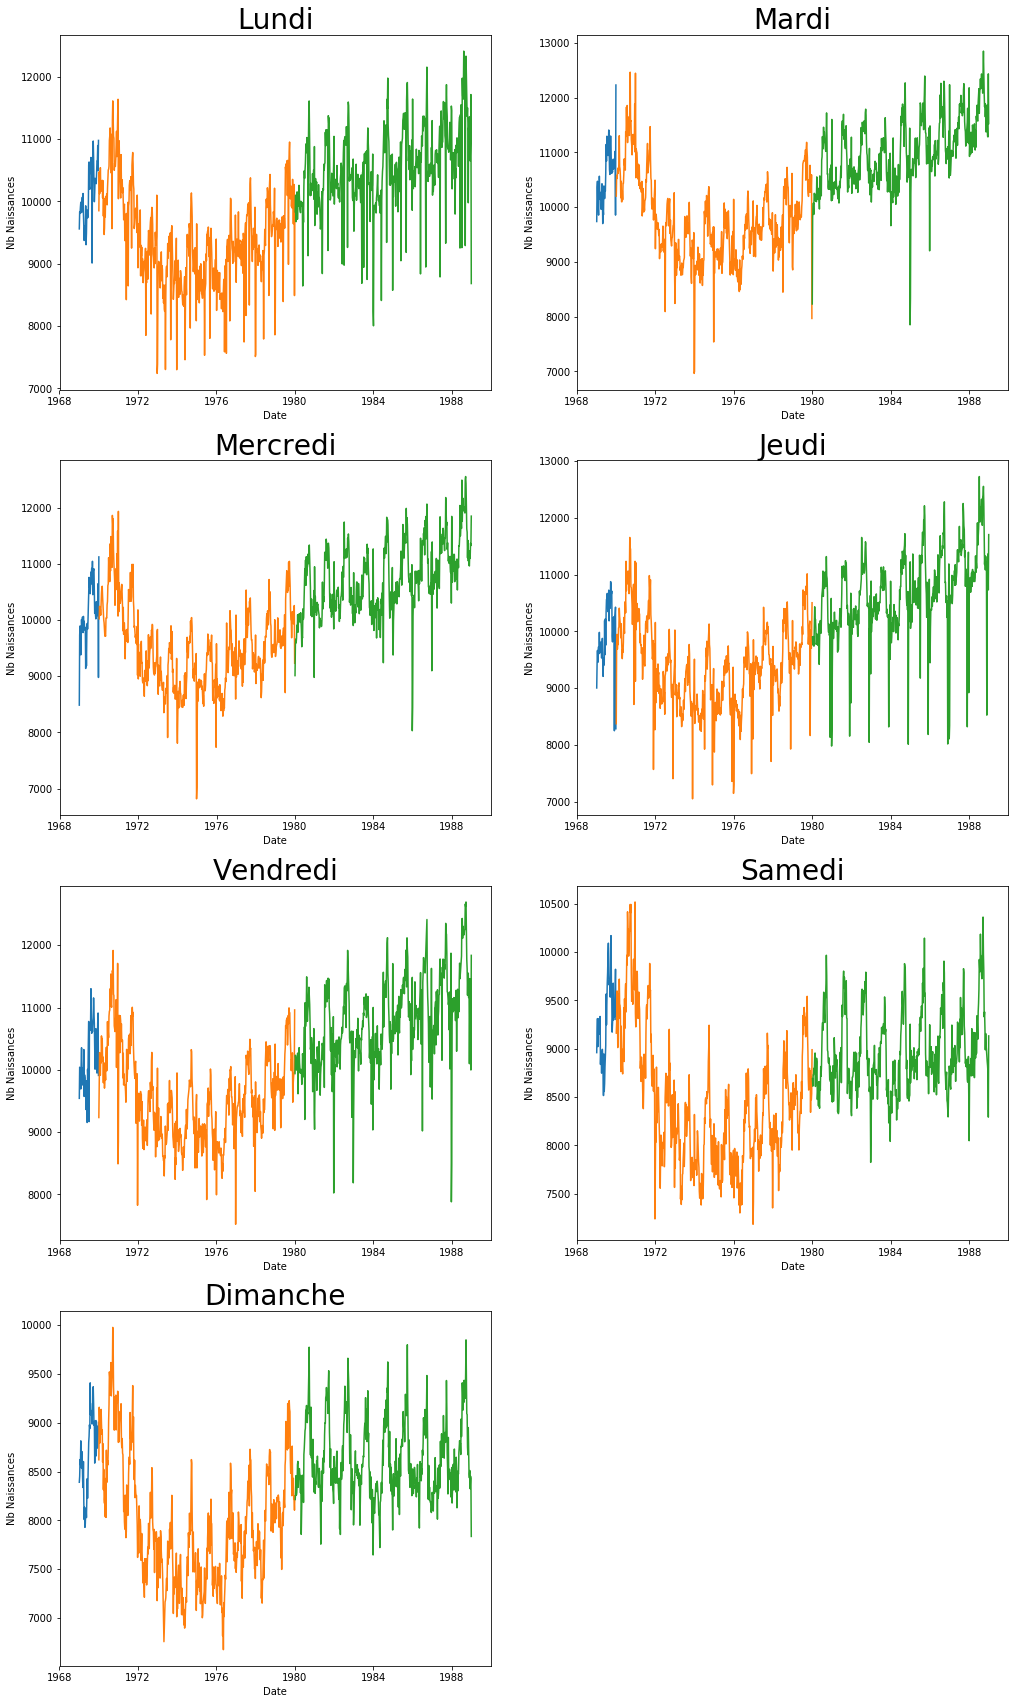

In [40]:
fig = plt.figure(figsize=(17,30))

for i in range(7):
    fig.add_subplot(4,2, i+1)
    plt.xlabel('Date')
    plt.ylabel('Nb Naissances')
    plt.plot(jour_semaine(decenie_60, i)["births"])
    plt.plot(jour_semaine(decenie_70, i)["births"])
    plt.plot(jour_semaine(decenie_80, i)["births"])
    plt.title(hebdo[i], fontsize=28)